# Project 2: Wrangle and Analyze Data

In this notebook, I will wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. To do this, I will utlised the Twitter archive and gather from other sources. Then I will assess and clean as required for future analyses and visualizations.

## Table of Contents:
1. [Gather](#gather)
    1. [Enchanced WeRateDogs Twitter archive](#archive)
    2. [The tweet image predictions](#image_predictions)
    3. [Additional data from the Twitter API](#twiter_api)
2. [Assess](#assess)
    1. [Visual Assessment](#visual)
    2. [Programmatic Assessment](#programmatic)
        1. [Non-directed Programmatic Assessment](#nondirected)
        2. [Directed Programmatic Assessment](#directed)
    3. [Issues](#issues)
3. [Clean](#clean)
4. [Store](#store)
5. [Analyze and Visualize](#analyze_and_visualize)



## Gather
<a class="anchor" id="gather"></a>

In this section, I will gather data from various data sources and in various formats. I will then stored each way in seperate Pandas dataframes. 

The 3 data sources and methods are as follows:
 * The Enchanced WeRateDogs Twitter archive. The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets. It is a *csv* data file provided by Udacity. This will be downloaded and simply read in.
 * The Tweet Image Predictions File archive. A *tsv* data file hosted on Udacity's servers. This will be  downloaded programmatically using the `Requests` library and a *URL*.
 * Additional data via the Twitter *API*. This twitter archive *JSON* data will be accessed using `Tweepy` and the `JSON` library.
 

In [1]:
# Imports
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# From twitter-api.py
import tweepy
import json


# Magic Commands
%matplotlib inline

##### Create Data folder
Use OS method to check if this folder exists and create a new one if it doesn't.

In [2]:
# Make directory if it doesn't already exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

### Enchanced WeRateDogs Twitter archive
<a id="archive" class="anchor"></a>

Download the `twitter-archive-enhanced.csv` (done manually) and read it into a Pandas DataFrame


In [3]:
# Read CSV (comma-separated) file into DataFrame
df_twitter_archive_enhanced = pd.read_csv(os.path.join(folder_name, 'twitter-archive-enhanced.csv'))

### The tweet image predictions
<a id="image_predictions" class="anchor"></a>

Download the `image_predictions.tsv` from the provided URL using the `Request` library.

In [4]:
# Read TSV (tab-separated) file into DataFrame 
df_image_predictions = pd.read_csv(os.path.join(folder_name, 'image_predictions.tsv'), sep='\t')

### Additional data from the Twitter API
<a id="twiter_api" class="anchor"></a>

Query each tweet's retweet count and favorite ("like") count using the `Tweepy` library and stored the data in `tweet_json.txt`

>Please note I had Twitter mobile verification issues so I used the Udacity code provided for this API section.

Read the `tweet_json.txt` line by line into a pandas DataFrame with **tweet ID, retweet count, and favorite count**

In [5]:
# Open txt file and read into DataFrame 

tweet_json_list = [] # create list to store data

with open(os.path.join(folder_name,'tweet_json.txt')) as f:
    for line in f: # line-by-line
        line_dict = json.loads(line) # format json
        # isolote relevent json data and append to list 
        tweet_json_list.append({'tweet_id': line_dict['id'], 
                                'retweet_count': line_dict['retweet_count'], 
                                'favorite_count':line_dict['favorite_count'],
                                }) 

df_tweet_json = pd.DataFrame(tweet_json_list, columns=['tweet_id', 'retweet_count', 'favorite_count']) # convert to Dataframe

## Assess
<a id="assess" class="anchor"></a>

### Visual Assessment
<a id="visual" class="anchor"></a>

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes

In [6]:
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Programmatic Assessment
<a id="programmatic" class="anchor"></a>

Pandas' functions and/or methods are used to assess the data

#### Non-directed Programmatic Assessment
<a id="nondirected" class="anchor"></a>

Display a random sample of entries using the `.sample` method *pandas* on the data frames.

In [9]:
df_twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
964,750506206503038976,NaN,NaN,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,None,None,pupper,None
1259,710272297844797440,NaN,NaN,2016-03-17 01:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710272297...,11,10,infuriating,None,None,None,None
519,810284430598270976,NaN,NaN,2016-12-18 00:43:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's a father. A very good fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810284430...,13,10,Phil,None,None,None,None
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420...,13,10,None,None,None,None,None
2133,670073503555706880,NaN,NaN,2015-11-27 02:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He wants to be a power drill. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670073503...,10,10,Winston,None,None,None,None
2284,667192066997374976,NaN,NaN,2015-11-19 04:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*takes several long deep breaths* omg omg oMG ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667192066...,12,10,None,None,None,None,None
221,849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,10,None,None,None,None,None
1109,733828123016450049,NaN,NaN,2016-05-21 01:13:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. The harder you hug him the fart...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733828123...,10,10,Terry,None,None,None,None
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None
284,838921590096166913,NaN,NaN,2017-03-07 01:17:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlo. He's officially the king of snow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838921590...,13,10,Arlo,None,None,None,None


In [10]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1763,826240494070030336,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,French_bulldog,0.903048,True,pug,0.096242,True,Boston_bull,0.000234,True
946,704499785726889984,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,Chihuahua,0.376541,True,Siamese_cat,0.098057,False,Labrador_retriever,0.085211,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
769,689283819090870273,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,1,Scotch_terrier,0.267979,True,affenpinscher,0.199619,True,cairn,0.127469,True
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
1475,780476555013349377,https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...,1,pug,0.919255,True,French_bulldog,0.032350,True,bull_mastiff,0.028468,True
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,dogsled,0.426494,False,cocker_spaniel,0.073101,True,Chihuahua,0.070323,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True


In [11]:
df_tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
1037,744234799360020481,79515,131075
642,793195938047070209,6547,17063
2108,670444955656130560,2153,7120
1487,692905862751522816,998,2683
1272,709198395643068416,721,2634
2127,670290420111441920,315,750
1511,691096613310316544,1019,3253
196,854482394044301312,7608,31131
377,827933404142436356,5987,22180
500,813096984823349248,4207,11694


#### Directed Programmatic Assessment
<a id="directed" class="anchor"></a>

Programmatic assessment using functions and methods to reveal the data's quality and tidiness.

In [12]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
df_twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [19]:
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [20]:
df_tweet_json.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [21]:
# Check the name is the same if converted to lowercase
df_twitter_archive_enhanced [df_twitter_archive_enhanced ['name'].str.lower() == df_twitter_archive_enhanced ['name']].name.unique()  

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Issues
<a id="issues" class="anchor"></a>

#### Quality

##### `twitter_archive_enhanced`  Table
- Majority of values in `in_reply_to_status_id` and `in_reply_to_user_id` are null
- Some dogs are named to 'a' and all lowercase names are not dog names
- `timestamp` is string not dateTime object 
- Some `rating_denominator` values aren't 10. All should be equal to 10.
- Some rows are retweets (not original ratings) marked by the `retweeted_status_id` column
- Not all tweets have images marked by nulls in `expanded_url` column
- tweet_id should have string datatype 

##### `image_predictions`  Table
- Dog prediction doesn't always predict a dog.
- tweet_id should have string datatype 

##### `tweet_json` Table
- tweet_id should have string datatype 
- Column headers could be more descriptive 

#### Tidiness

##### `twitter_archive_enhanced`  Table
- Columns `doggo`, `floofer`, `pupper` and `puppo` are qualitative ratings and should be in one combined column and should be Dtype unordered catergorical

##### `tweet_json` Table
- This table contains similar infomation to `twitter_archive_enhanced` and should be combined.

## Clean
<a id="clean" class="anchor"></a>

First I make copies of the datasets as to prevent modification to the orginal sets.

In [22]:
# Create copies of original data
df_twitter_archive_enhanced_copy = df_twitter_archive_enhanced.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_tweet_json_copy = df_tweet_json.copy()

### Define

Convert timestamp column to dateTime Dtype

### Code

In [23]:
df_twitter_archive_enhanced_copy.timestamp = pd.to_datetime(df_twitter_archive_enhanced_copy.timestamp)

### Test

In [24]:
df_twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define

Convert all ID columns (tweet_id) in dataframes to string datatype 

### Code

In [25]:
df_twitter_archive_enhanced_copy.tweet_id = df_twitter_archive_enhanced_copy.tweet_id.astype(str)
df_image_predictions_copy.tweet_id = df_image_predictions_copy.tweet_id.astype(str)
df_tweet_json_copy.tweet_id = df_tweet_json_copy.tweet_id.astype(str)

### Test

In [26]:
print(df_twitter_archive_enhanced_copy.dtypes)

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object


In [27]:
print(df_image_predictions_copy.dtypes)

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


In [28]:
print(df_tweet_json_copy.dtypes)

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object


### Define

Drop unnecessary columns `in_reply_to_status_id` and `in_reply_to_user_id` as these null values cannot be addresssed.

### Code

In [29]:
df_twitter_archive_enhanced_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

### Test

In [30]:
df_twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   timestamp                   2356 non-null   datetime64[ns, UTC]
 2   source                      2356 non-null   object             
 3   text                        2356 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2297 non-null   object             
 8   rating_numerator            2356 non-null   int64              
 9   rating_denominator          2356 non-null   int64              
 10  name                        2356 non-null   object          

### Define

Locate all lowercase names and replace with NaNs. The, replace the NaNs with None values. 

In [31]:
df_twitter_archive_enhanced_copy[df_twitter_archive_enhanced_copy['name'].str.lower() == df_twitter_archive_enhanced_copy['name']].name.unique()  

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Code

In [32]:
# Replace all lowercase strings with NaNs
df_twitter_archive_enhanced_copy.loc[(df_twitter_archive_enhanced_copy['name'].str.lower() == df_twitter_archive_enhanced_copy ['name']), 'name'] = np.nan

#Finally: Replace None with NaN
df_twitter_archive_enhanced_copy['name'].replace('None', np.nan, inplace=True)

### Test

In [33]:
# Check the name is the same if converted to lowercase - should be empty
df_twitter_archive_enhanced_copy[df_twitter_archive_enhanced_copy['name'].str.lower() == df_twitter_archive_enhanced_copy['name']].name.unique()  

array([], dtype=object)

### Define

##### `tweet_json` Table
- This table contains similar infomation to `twitter_archive_enhanced` and should be combined.

Combine `df_twitter_archive_enhanced_copy` and `df_tweet_json_copy` into one dataframe based on tweet_id and keep only the ids that contain the retweet and favourite counts.

#### Code

In [34]:
df_merged = pd.merge(left=df_twitter_archive_enhanced_copy, right=df_tweet_json_copy, how='inner', on='tweet_id')

### Test

In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   object             
 1   timestamp                   2354 non-null   datetime64[ns, UTC]
 2   source                      2354 non-null   object             
 3   text                        2354 non-null   object             
 4   retweeted_status_id         179 non-null    float64            
 5   retweeted_status_user_id    179 non-null    float64            
 6   retweeted_status_timestamp  179 non-null    object             
 7   expanded_urls               2295 non-null   object             
 8   rating_numerator            2354 non-null   int64              
 9   rating_denominator          2354 non-null   int64              
 10  name                        1501 non-null   object          

### Define

Combine dog stages types into one column and cast to unordered categorical type. Drop old columns once done.

### Code

In [36]:
df_merged['dog_stages'] = np.select(condlist = [df_merged['doggo'] == 'doggo', df_merged['floofer'] == 'floofer', df_merged['pupper'] == 'pupper', df_merged['puppo'] == 'puppo'], choicelist = ['doggo', 'floofer', 'pupper', 'puppo'], default = 'None')
df_merged.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048,None


In [37]:
# Drop columns
df_merged.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

# Cast to categorical type
unordered_var = pd.api.types.CategoricalDtype(ordered = False, categories = ['doggo', 'floofer', 'pupper', 'puppo', 'None'])
df_merged['dog_stages'] = df_merged['dog_stages'].astype(unordered_var)

### Test

In [38]:
df_merged.dog_stages.value_counts()

None       1975
pupper      244
doggo        97
puppo        29
floofer       9
Name: dog_stages, dtype: int64

In [39]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   object             
 1   timestamp                   2354 non-null   datetime64[ns, UTC]
 2   source                      2354 non-null   object             
 3   text                        2354 non-null   object             
 4   retweeted_status_id         179 non-null    float64            
 5   retweeted_status_user_id    179 non-null    float64            
 6   retweeted_status_timestamp  179 non-null    object             
 7   expanded_urls               2295 non-null   object             
 8   rating_numerator            2354 non-null   int64              
 9   rating_denominator          2354 non-null   int64              
 10  name                        1501 non-null   object          

### Define

Remove tweets without images by dropping all rows where `expanded_urls` are null.

### Code

In [40]:
df_merged.expanded_urls.isnull().sum()

59

In [41]:
df_merged.dropna(subset=['expanded_urls'], axis=0, inplace=True)

### Test

In [42]:
df_merged.expanded_urls.isnull().sum()

0

### Define

Remove retweets by dropping rows with non-null `retweeted_status_*` columns and drop the columns

### Code

In [43]:
df_merged = df_merged[df_merged.retweeted_status_id.isnull() == True]
df_merged.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

### Test

In [44]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                1391 non-null   object             
 8   retweet_count       2117 non-null   int64              
 9   favorite_count      2117 non-null   int64              
 10  dog_stages          2117 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 184.2+ KB


### Define

Replace all `rating_denominator` values with 10.

### Code

In [45]:
denominators = df_merged.rating_denominator.value_counts().sort_index().index.to_numpy()
denominators

array([  2,   7,  10,  11,  20,  40,  50,  70,  80,  90, 110, 120, 130,
       150, 170])

In [46]:
df_merged.rating_denominator.replace(denominators, 10, inplace=True)

### Test

In [47]:
df_merged.rating_denominator.value_counts()

10    2117
Name: rating_denominator, dtype: int64

### Define

Rename image_predictions columns to more descriptive column names using pandas's rename() function.

### Code

In [48]:
df_image_predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [49]:
df_image_predictions_copy.rename(columns = {'img_num':'image_number_used_for_most_confident_prediction',
                                       'p1':'number_1_prediction',
                                       'p2':'number_2_prediction',
                                       'p3':'number_3_prediction',
                                       'p1_conf':'confidence_in_number_1_prediction',
                                       'p2_conf':'confidence_in_number_2_prediction',
                                       'p3_conf':'confidence_in_number_3_prediction',
                                       'p1_dog':'prediction_1_is_a_breed_of_dog',
                                       'p2_dog':'prediction_2_is_a_breed_of_dog',
                                       'p3_dog':'prediction_3_is_a_breed_of_dog',
                                       }, inplace = True)

### Test

In [50]:
df_image_predictions_copy.columns

Index(['tweet_id', 'jpg_url',
       'image_number_used_for_most_confident_prediction',
       'number_1_prediction', 'confidence_in_number_1_prediction',
       'prediction_1_is_a_breed_of_dog', 'number_2_prediction',
       'confidence_in_number_2_prediction', 'prediction_2_is_a_breed_of_dog',
       'number_3_prediction', 'confidence_in_number_3_prediction',
       'prediction_3_is_a_breed_of_dog'],
      dtype='object')

### Define

Select only image records of dog either in P1, P2 or P3. 

More precisely: Select P1 if P1_dog is dog and so on. If the first prediction is not a dog and the second is then we take the second etc. If none of them are dogs, then drop the row.

### Code

In [51]:
df_dog_predictions = df_image_predictions_copy[['prediction_1_is_a_breed_of_dog', 'prediction_2_is_a_breed_of_dog', 'prediction_3_is_a_breed_of_dog']]
df_dog_predictions

,prediction_1_is_a_breed_of_dog,prediction_2_is_a_breed_of_dog,prediction_3_is_a_breed_of_dog
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
2070,True,True,True
2071,False,True,False
2072,True,True,True
2073,True,True,True


In [52]:
# checks if at least one row value is true for dog prediction
df_image_predictions_copy['dog_predictions_results'] = df_dog_predictions.any(axis=1)
df_image_predictions_copy['dog_predictions_results'].value_counts()

True     1751
False     324
Name: dog_predictions_results, dtype: int64

In [53]:
df_image_predictions_copy = df_image_predictions_copy[df_image_predictions_copy['dog_predictions_results'] == True]

In [54]:
df_image_predictions_copy.reset_index(drop=True, inplace=True)
df_image_predictions_copy.drop(columns=['dog_predictions_results'], inplace=True)

### Test

Check if rows were dropped if all predictions were false for dog breed

In [55]:
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   tweet_id                                         1751 non-null   object 
 1   jpg_url                                          1751 non-null   object 
 2   image_number_used_for_most_confident_prediction  1751 non-null   int64  
 3   number_1_prediction                              1751 non-null   object 
 4   confidence_in_number_1_prediction                1751 non-null   float64
 5   prediction_1_is_a_breed_of_dog                   1751 non-null   bool   
 6   number_2_prediction                              1751 non-null   object 
 7   confidence_in_number_2_prediction                1751 non-null   float64
 8   prediction_2_is_a_breed_of_dog                   1751 non-null   bool   
 9   number_3_prediction           

### Code

In [56]:
df_image_predictions_copy.columns

Index(['tweet_id', 'jpg_url',
       'image_number_used_for_most_confident_prediction',
       'number_1_prediction', 'confidence_in_number_1_prediction',
       'prediction_1_is_a_breed_of_dog', 'number_2_prediction',
       'confidence_in_number_2_prediction', 'prediction_2_is_a_breed_of_dog',
       'number_3_prediction', 'confidence_in_number_3_prediction',
       'prediction_3_is_a_breed_of_dog'],
      dtype='object')

In [57]:
df_image_predictions_copy['dog_breed'] = np.select(condlist = [df_image_predictions_copy['prediction_1_is_a_breed_of_dog'] == True, df_image_predictions_copy['prediction_2_is_a_breed_of_dog'] == True, df_image_predictions_copy['prediction_3_is_a_breed_of_dog'] == True], choicelist = [df_image_predictions_copy['number_1_prediction'], df_image_predictions_copy['number_2_prediction'], df_image_predictions_copy['number_3_prediction']])
df_image_predictions_copy.drop(columns=['number_1_prediction', 
                                        'confidence_in_number_1_prediction',
                                        'prediction_1_is_a_breed_of_dog', 
                                        'number_2_prediction',
                                        'confidence_in_number_2_prediction', 
                                        'prediction_2_is_a_breed_of_dog',
                                        'number_3_prediction', 
                                        'confidence_in_number_3_prediction',
                                        'prediction_3_is_a_breed_of_dog'], inplace=True)

### Test

In [58]:
df_image_predictions_copy.head()

,tweet_id,jpg_url,image_number_used_for_most_confident_prediction,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


In [59]:
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   tweet_id                                         1751 non-null   object
 1   jpg_url                                          1751 non-null   object
 2   image_number_used_for_most_confident_prediction  1751 non-null   int64 
 3   dog_breed                                        1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.8+ KB


## Store
<a id="store" class="anchor"></a>

Store data to csv file

In [60]:
# Final Dataframes to store
df_clean = df_merged.copy()
df_image_predictions_clean = df_image_predictions_copy.copy()

In [61]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
df_image_predictions_clean.to_csv('image_predictions_clean.csv', index=False)

# Analyze and Visualize
<a id="analyze_and_visualize" class="anchor"></a>

This dataset is about dog tweets and their ratings. A good insight would be popularity of the WeRateDogs twitter account tweets. The distribution of the retweet_count and favorite_count would indicate that as well as knowing the average number of retweets and favorited against the total number of tweets produced in this dataset. 

It would also be good to know the distribution of the dog ratings to see how good they all were and the most popular dog breed and dog name.

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                1391 non-null   object             
 8   retweet_count       2117 non-null   int64              
 9   favorite_count      2117 non-null   int64              
 10  dog_stages          2117 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 184.2+ KB


In [63]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   tweet_id                                         1751 non-null   object
 1   jpg_url                                          1751 non-null   object
 2   image_number_used_for_most_confident_prediction  1751 non-null   int64 
 3   dog_breed                                        1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.8+ KB


In [64]:
df_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2117.000000,2117.0,2117.000000,2117.000000
mean,12.246103,10.0,2826.723666,8936.635805
std,40.275298,0.0,4690.613712,12156.148830
min,0.000000,10.0,16.000000,81.000000
25%,10.000000,10.0,638.000000,2044.000000
50%,11.000000,10.0,1392.000000,4181.000000
75%,12.000000,10.0,3265.000000,11363.000000
max,1776.000000,10.0,79515.000000,132810.000000


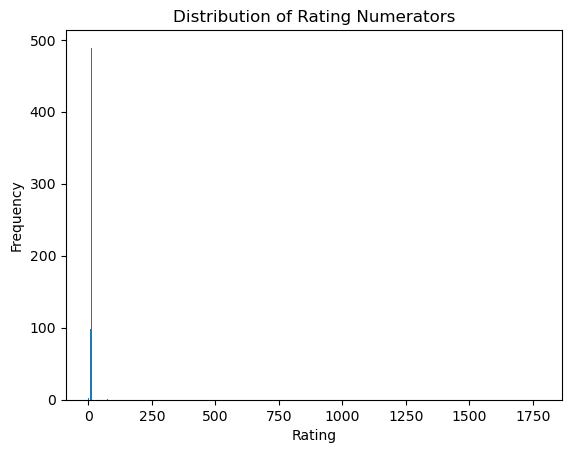

In [65]:
plt.hist(data=df_clean, x='rating_numerator', bins='auto')
plt.title('Distribution of Rating Numerators')
plt.xlabel('Rating')
plt.ylabel('Frequency');

This is difficult to see the distribution so I will use a pie chart instead.

In [66]:
rating_numerator_counts = df_clean.rating_numerator.value_counts()
rating_numerator_counts

12      489
10      436
11      417
13      295
9       154
8        98
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         2
45        1
144       1
88        1
26        1
121       1
143       1
44        1
60        1
165       1
80        1
99        1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
420       1
Name: rating_numerator, dtype: int64

In [67]:
labels = np.full(len(df_clean.rating_numerator.value_counts()), "", dtype=object)
labels[0] = '10'
labels[1] = '12'
labels[2] = '11'
labels[3] = '13'
labels[4] = '9'
labels

array(['10', '12', '11', '13', '9', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', ''], dtype=object)

Text(0, 0.5, '')

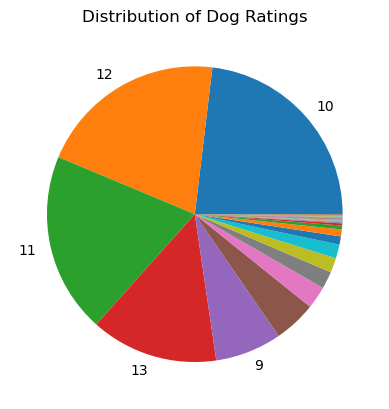

In [68]:
df_clean.rating_numerator.value_counts().plot(kind='pie', labels=labels)
plt.title('Distribution of Dog Ratings')
plt.ylabel('')

The majority of dogs are between 9 to 13 ratings however there are some outliers at greater than 20 ratings. There was no cap indicated so these might be valid values.

Text(0, 0.5, 'Frequency')

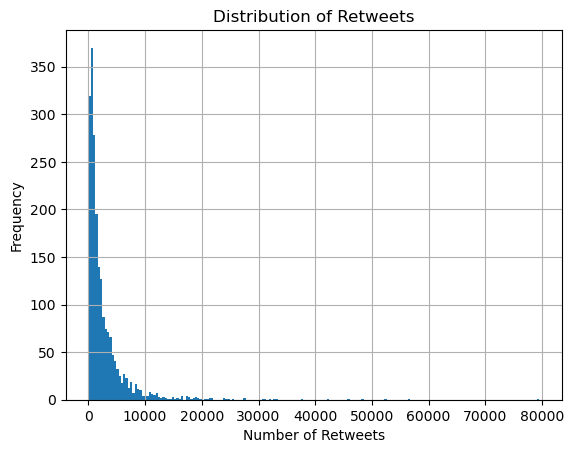

In [69]:
df_clean.retweet_count.hist(bins='auto');
plt.title('Distribution of Retweets')
plt.xlabel('Number of Retweets')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

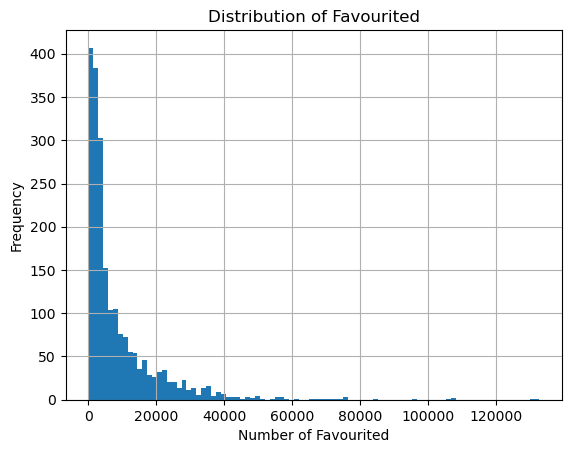

In [70]:
df_clean.favorite_count.hist(bins='auto');
plt.title('Distribution of Favourited')
plt.xlabel('Number of Favourited')
plt.ylabel('Frequency')

The distributions are both right-skewed. This is typical of social media posts where there are a fewer posts with larger likes or follwings versus a large amount of posts with few retweets/ favourites. As the boxplot highlights, the larger amount of retweets and favoruties are outliers.

This bar groah 

Text(0.5, 1.0, 'Boxplot of Retweet and Favourited Count')

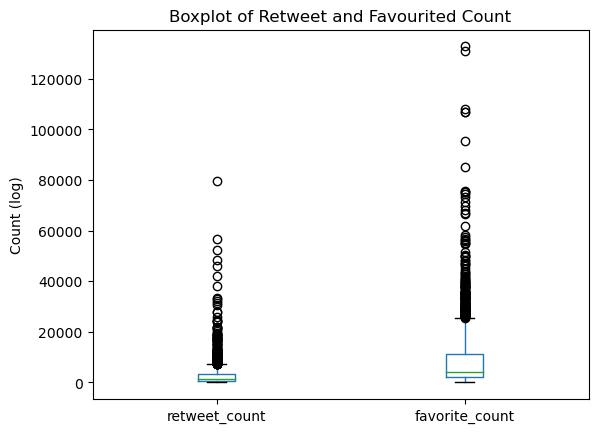

In [71]:
df_clean.boxplot(column = ['retweet_count', 'favorite_count'], grid=False)
plt.ylabel('Count (log)')
plt.title('Boxplot of Retweet and Favourited Count')

Text(0.5, 1.0, 'Boxplot of Retweet and Favourited Count')

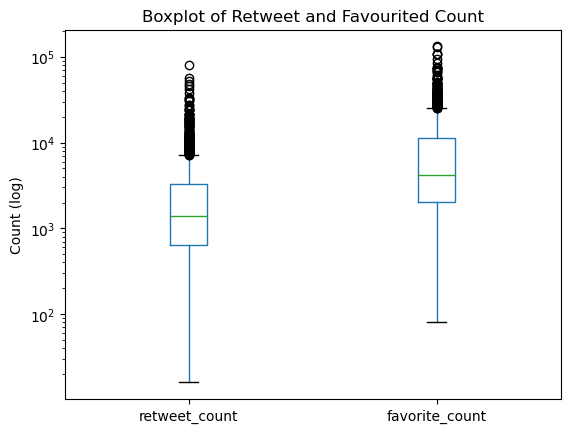

In [72]:
df_clean.boxplot(column = ['retweet_count', 'favorite_count'], grid=False)
plt.yscale('log')
plt.ylabel('Count (log)')
plt.title('Boxplot of Retweet and Favourited Count')

In [73]:
num_of_tweets = df_clean.tweet_id.count()
average_num_of_retweets = df_clean.retweet_count.mean()
average_num_of_favourited = df_clean.favorite_count.mean()

data = [num_of_tweets, average_num_of_retweets,average_num_of_favourited]

[Text(0, 0, '2117'), Text(0, 0, '2827'), Text(0, 0, '8937')]

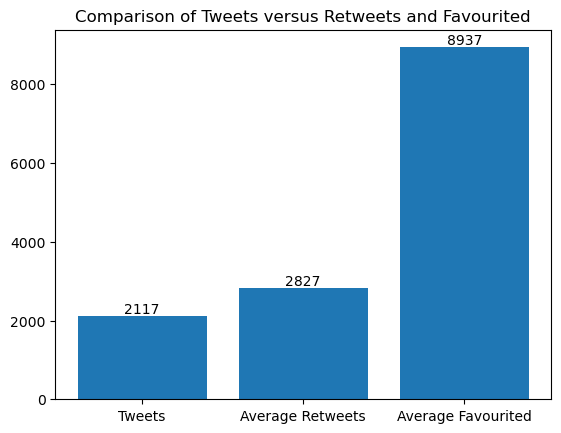

In [74]:
fig, ax = plt.subplots()
vbar = ax.bar(x=['Tweets', 'Average Retweets', 'Average Favourited'], height=data)
ax.set_title('Comparison of Tweets versus Retweets and Favourited')
ax.bar_label(vbar, labels=['%.0f' % d for d in data])

In [75]:
print('Return on Retweets', average_num_of_retweets/num_of_tweets)

Return on Retweets 1.335249723932205


In [76]:
print('Return on Favourited', average_num_of_favourited/num_of_tweets)

Return on Favourited 4.221367881617845


In [77]:
df_image_predictions_clean.dog_breed.value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

In [78]:
df_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

The final bar graph shows the popularity of the WeRateDogs page. The average tweet returns 1.3x as many retweets and 4.2x as many favourites. Indeed this is popular page and the people love dog tweets.

1. The most common ratings were from 9-13. 
2. The most popular names were Charlie and Lucy, followed by Charlie and Oliver.
3. The most poplar dog breed was Golden Retriever followed by Labrador Retriver.